In [1]:
import numpy as np
import tensorflow as tf
import zipfile
from imageio import imread
# from skimage.io import imread
from skimage.transform import resize
import pprint


import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import (Flatten, Dense, Dropout)

In [3]:
import urllib.request
import os.path
if not os.path.exists("GTSRB_Final_Training_Images.zip"):
    # Get file from URL
    url = ""
    filename = "./GTSRB_Final_Training_Images.zip"
    urllib.request.urlretrieve(url, filename)
    
    

In [4]:
IMG_SIZE = 32
TEST_SIZE = 0.2

X, Xt, y, yt = list(), list(), list(), list()

archive = zipfile.ZipFile('./GTSRB_Final_Training_Images.zip', 'r')

file_paths = [file for file in archive.namelist() 
              if '.ppm' in file]

for filename in file_paths:
    with archive.open(filename) as img_file:

        img = imread(img_file.read())
        img = resize(img,
                     output_shape=(IMG_SIZE, IMG_SIZE),
                     mode='reflect',
                     anti_aliasing=True
                    )
        img_class = int(filename.split('/')[-2])
        

#     img = imread(archive.open(filename))
#     img = resize(img,
#                  output_shape=(IMG_SIZE, IMG_SIZE),
#                  mode='reflect',
#                  anti_aliasing=True
#                 )
#     img_class = int(filename.split('/')[-2])

    if (hash(filename) % 1000) / 1000 > TEST_SIZE:
        X.append(img)
        y.append(img_class)
    else:
        Xt.append(img)
        yt.append(img_class)
archive.close()

No classes:43


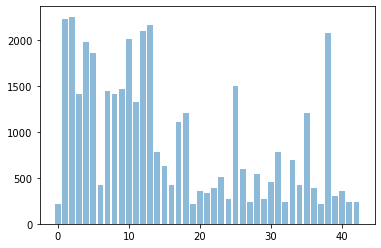

In [8]:
test_ratio = len(Xt) / len(file_paths)
# print("Train size: {} test size: {} ({:0.3f})").format(
#     len(X), 
#     len(Xt),
#     test_ratio)

classes, dist = np.unique(y+yt, return_counts = True)
NUM_CLASSES = len(classes)
print("No classes:{}".format(NUM_CLASSES))

plt.bar(classes, dist, align = 'center', alpha = 0.5)
plt.show()



In [ ]:
# ########################################################
# # Neural network architecture
# ########################################################
# def neural_network():
# 	"""
# 	Define neural network architecture
# 	Return relevant tensor references
# 	"""
# 	with tf.variable_scope('neural_network'):
# 		# Tensors representing input images and labels
# 		x = tf.placeholder('float', [None, IMG_SIZE, IMG_SIZE, NUM_CHANNELS])
# 		y = tf.placeholder('float', [None, NUM_CLASSES])

# 		# Placeholder for dropout keep probability
# 		keep_prob = tf.placeholder(tf.float32)

# 		# Neural network architecture: Convolutional Neural Network (CNN)
# 		# Using TensorFlow-Slim to build the network:
# 		# https://github.com/tensorflow/tensorflow/tree/master/tensorflow/contrib/slim

# 		# Use batch normalization for all convolution layers
# 		with slim.arg_scope([slim.conv2d], normalizer_fn=slim.batch_norm):
# 			# Given x shape is (32, 32, 3)
# 			# Conv and pool layers
# 			net = Conv2D(x, 16, [3, 3], scope='conv0')  # output shape: (32, 32, 16)
# 			net = MaxPool2D(net, [3, 3], 1, padding='SAME', scope='pool0')  # output shape: (32, 32, 16)
# 			net = Conv2D(net, 64, [5, 5], 3, padding='VALID', scope='conv1')  # output shape: (10, 10, 64)
# 			net = MaxPool2D(net, [3, 3], 1, scope='pool1')  # output shape: (8, 8, 64)
# 			net = Conv2D(net, 128, [3, 3], scope='conv2')  # output shape: (8, 8, 128)
# 			net = Conv2D(net, 64, [3, 3], scope='conv3')  # output shape: (8, 8, 64)
# 			net = MaxPool2D(net, [3, 3], 1, scope='pool3')  # output shape: (6, 6, 64)

# 			# Final fully-connected layers
# 			net = Flatten(net)
# 			net = Dense(net, 1024, scope='fc4')
# 			net = Dropout(net, keep_prob)

# 			net = Dense(net, 1024, scope='fc5')
# 			net = Dropout(net, keep_prob)
# 			net = Dense(net, NUM_CLASSES, scope='fc6')
# 		# Final output (logits)
# 		logits = net

# 		# Loss (data loss and regularization loss) and optimizer
# 		loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
# 		optimizer = OPT.minimize(loss)

# 		# Prediction (used during inference)
# 		predictions = tf.argmax(logits, 1)

# 		# Accuracy metric calculation
# 		correct_predictions = tf.equal(predictions, tf.argmax(y, 1))
# 		accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

# 	# Return relevant tensor references
# 	return x, y, keep_prob, logits, optimizer, predictions, accuracy




# # Use batch normalization for all convolution layers
# with slim.arg_scope([slim.conv2d], normalizer_fn=slim.batch_norm):
#     # Given x shape is (32, 32, 3)
#     # Conv and pool layers
#     net = slim.conv2d(x, 16, [3, 3], scope='conv0')  # output shape: (32, 32, 16)
#     net = slim.max_pool2d(net, [3, 3], 1, padding='SAME', scope='pool0')  # output shape: (32, 32, 16)
#     net = slim.conv2d(net, 64, [5, 5], 3, padding='VALID', scope='conv1')  # output shape: (10, 10, 64)
#     net = slim.max_pool2d(net, [3, 3], 1, scope='pool1')  # output shape: (8, 8, 64)
#     net = slim.conv2d(net, 128, [3, 3], scope='conv2')  # output shape: (8, 8, 128)
#     net = slim.conv2d(net, 64, [3, 3], scope='conv3')  # output shape: (8, 8, 64)
#     net = slim.max_pool2d(net, [3, 3], 1, scope='pool3')  # output shape: (6, 6, 64)

#     # Final fully-connected layers
#     net = tf.contrib.layers.flatten(net)
#     net = slim.fully_connected(net, 1024, scope='fc4')
#     net = tf.nn.dropout(net, keep_prob)
#     net = slim.fully_connected(net, 1024, scope='fc5')
#     net = tf.nn.dropout(net, keep_prob)
#     net = slim.fully_connected(net, NUM_CLASSES, scope='fc6')
# # model.add(Dense(NUM_CLASSES, activation ='softmax'))
# return model

# model = small_cnn()
# model.compile(loss = 'categorical_crossentropu',
#              optimizer = Adam(),
#              metrics = ['accuracy'])

In [ ]:
# history = model.fit_generator(train_gen,
#                              steps_per_epoch = len(X), // batch_size
#                              validation_data = val_gen,
#                              validation_steps = len(Xt), // batch_size